In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Đọc dữ liệu, kiểm tra/định dạng thời gian

In [2]:
df = pd.read_csv("../../Data/international-airline-passengers.csv", index_col= "Month", parse_dates = ['Month'])
df.head()

,passengers_in_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   passengers_in_thousands  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,passengers_in_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


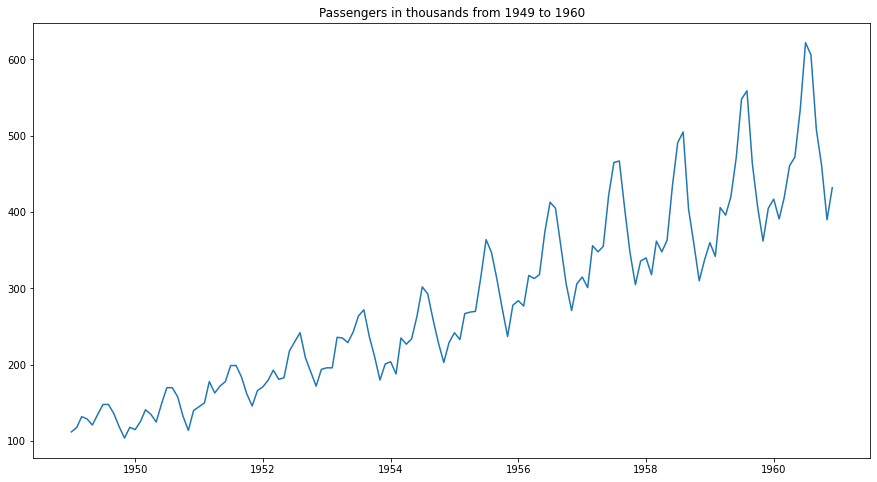

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(df)
plt.title("Passengers in thousands from 1949 to 1960")
plt.show()

## Decomposition

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
result = seasonal_decompose(df, model='multiplicative')
result

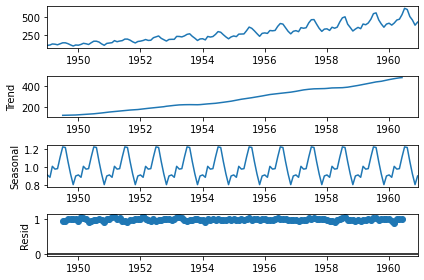

In [9]:
result.plot()
plt.show()

### Nhận xét
* Dữ liệu có xu hướng tăng
* Dữ liệu có xu hướng theo mùa

## Chia dữ liệu train/test => Áp dụng mô hình

In [10]:
train, test = df.iloc[:120, 0], df.iloc[120:, 0]

In [11]:
train[0:5]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: passengers_in_thousands, dtype: int64

In [12]:
test[0:5]

Month
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
Freq: MS, Name: passengers_in_thousands, dtype: int64

In [13]:
model = ExponentialSmoothing(train, seasonal='mul',
                             seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
pred = model.predict(start=test.index[0],
                     end=test.index[-1])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mae = mean_absolute_error(test, pred)
mae

74.45821681841201

In [17]:
mse = mean_squared_error(test, pred)
mse

6773.938592464828

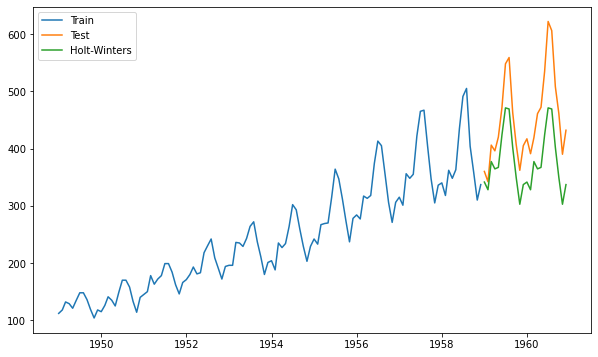

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label="Test")
plt.plot(pred.index, pred, label="Holt-Winters")
plt.legend(loc='best')
plt.show()

## Dự đoán

In [19]:
import datetime

In [20]:
s = datetime.datetime(1961, 1, 1)
e = datetime.datetime(1961, 12, 1)

pred_next_12_month = model.predict(start=s, end=e)
pred_next_12_month

1961-01-01    341.427432
1961-02-01    328.015592
1961-03-01    377.229404
1961-04-01    364.463605
1961-05-01    367.091807
1961-06-01    424.066736
1961-07-01    471.020948
1961-08-01    469.127884
1961-09-01    401.991032
1961-10-01    349.390608
1961-11-01    302.676351
1961-12-01    337.000000
Freq: MS, dtype: float64

In [21]:
x = pd.Series(pred_next_12_month)
type(x)

pandas.core.series.Series

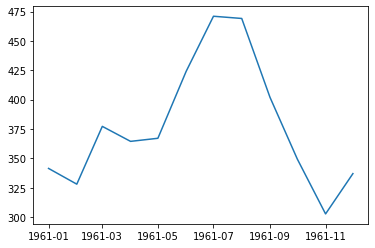

In [22]:
plt.plot(x.index, x.values)

## Trực quan hóa dữ liệu

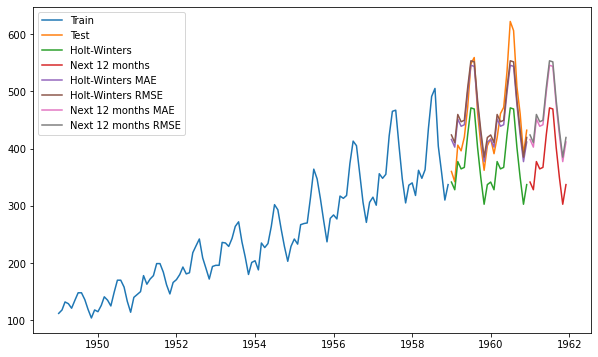

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label="Test")
plt.plot(pred.index, pred, label="Holt-Winters")
plt.plot(x.index, x.values, label="Next 12 months")
# Vẽ thêm 2 đường có gia giảm theo mae/rmse
plt.plot(pred.index, pred+mae, label="Holt-Winters MAE")
plt.plot(pred.index, pred+math.sqrt(mse), label="Holt-Winters RMSE")
plt.plot(x.index, x+mae, label="Next 12 months MAE")
plt.plot(x.index, x+math.sqrt(mse), label="Next 12 months RMSE")
plt.legend(loc='best')
plt.show()